In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [9]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
import scipy.special as sp #for the zeta function sp.zeta() in the 0x2 term


#-------BB parameters (to start)--------
A_BB = 1.7e3
alpha_BB = -3.0
beta_BB = -3.2
# beta_sigma = 1.5e-6

A_beta = 1e-6
gamma_BB = -2.1 #needs to be less than -2 for the 0x2 term to converge
nu0 = 95e9

nside=128

crit = 2/np.log(10)
sigma_default = crit/3

# #-------map paramters--------------------
# nside = 128
# Lmax = 3*nside
# ells = np.arange(0,Lmax)

#define list of frequencies going from 10 to 300 GHz, sampling 20 points
freqs = np.linspace(30,300,4)*1.e9
ells = np.arange(384)

Populating the interactive namespace from numpy and matplotlib


In [48]:
small_scale_cls = ff.powerlaw(ells, A_BB, alpha_BB)
large_scale_cls = ff.powerlaw(ells, A_BB, 2*alpha_BB)
very_small_cls = ff.powerlaw(ells, A_BB, alpha_BB/2)

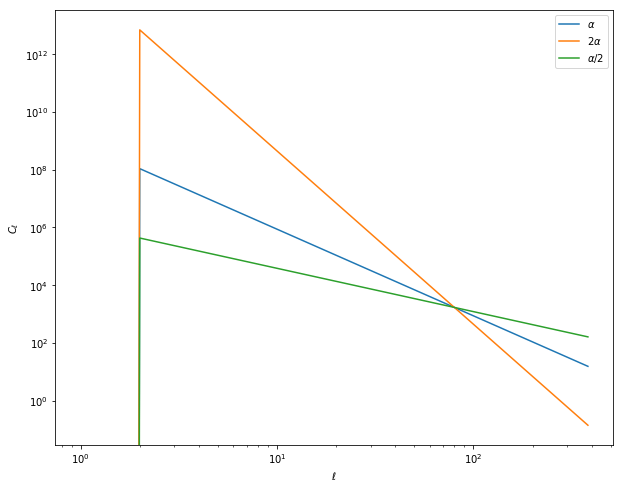

In [60]:
figure(figsize=(10,8))
loglog(ells, small_scale_cls, label=r'$\alpha$')
loglog(ells, large_scale_cls, label=r'$2\alpha$')
loglog(ells, very_small_cls, label=r'$\alpha$/2')
xlabel('$\ell$')
ylabel('$C_\ell$')
legend()

In [50]:
very_small_map =  hp.synfast(very_small_cls, nside, new=True, verbose=False)

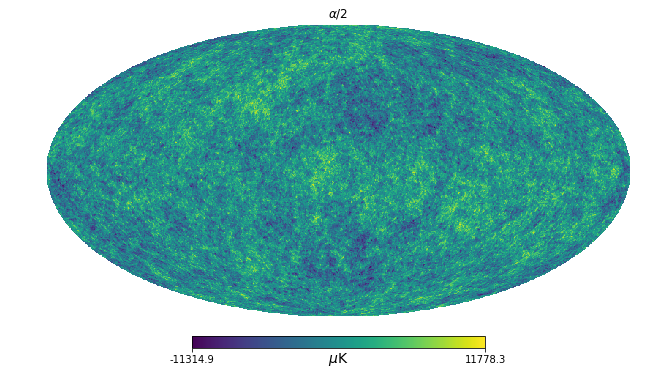

In [61]:
hp.mollview(very_small_map, unit=r'$\mu \rm K$', title=r'$\alpha/2$')

In [52]:
small_map = hp.synfast(small_scale_cls, nside, new=True, verbose=False)

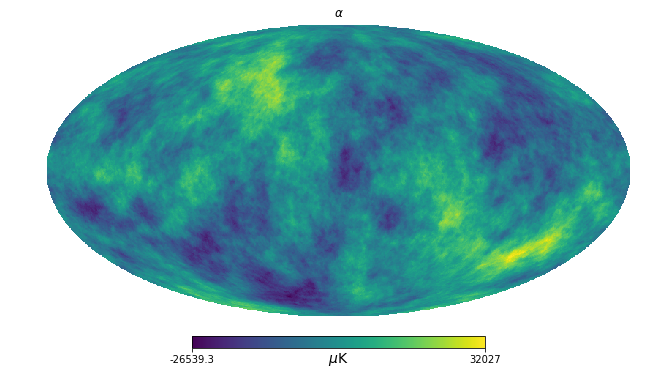

In [62]:
hp.mollview(small_map, unit=r'$\mu \rm K$', title=r'$\alpha$')

In [54]:
big_map = hp.synfast(large_scale_cls, nside, new=True, verbose=False)

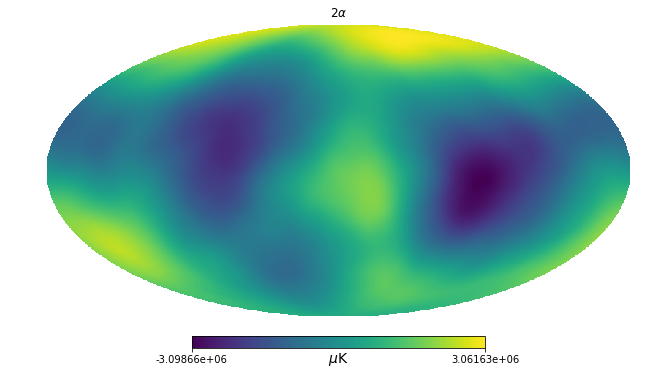

In [63]:
hp.mollview(big_map, unit=r'$\mu \rm K$', title=r'$2\alpha$')

# try plotting spherical harmonics

In [95]:
alm = np.zeros(4, dtype=complex)
alm[1] = 1

In [96]:
print(alm)
type(alm)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


numpy.ndarray

In [97]:
map1 = hp.alm2map(alm, 128, lmax=1, mmax=1)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


ValueError: Wrong alm size.

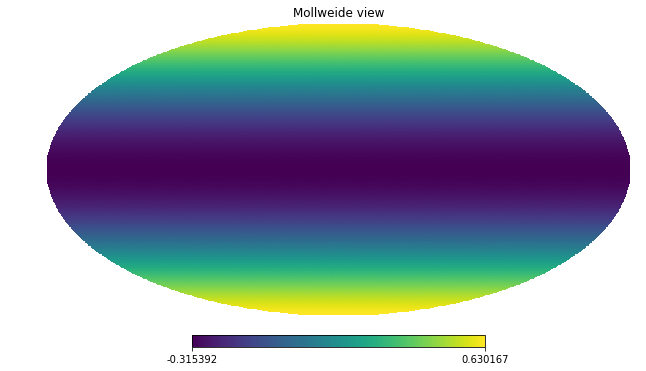

In [89]:
hp.mollview(map1)